**TIL:** In 1971 John List murdered his family to save their souls and arranged their bodies on sleeping bags. He then cleaned up, cut himself out of the family's photos, turned on a religious radio station, and fled. Only after the lights in the house had burned out one by one did neighbors call police. He moved to a new state, started a new life and luded capture for 18 years after. He was finally compromised after an airing of America’s Most Wanted featured an age-progressed bust of his head, which bore such a resemblance that one of List’s neighbors turned him in.

He left a 4-page long letter to his pastor, explaining his motives, why he killed each member (so they get to go to heaven) and why he DIDN'T killed himself (so he can reunite with them in heaven). He is a meticulous killer and made sure to give advance notices and cancel deliveries to avoid suspicion suspicious. The letter ended with the following line:

"P.S. Mother is in the hallway in the attic - 3d floor. She was too heavy to move.

John"

The full (digitized) letter can be read here: https://www.nytimes.com/1990/03/29/nyregion/i-know-that-what-has-been-done-is-wrong.html. The handwritten (original version) can be read here: https://www.youtube.com/watch?v=N51976UzQ5g

This letter, particularly the P.S line, lived in my mind rent-free. It's fascinating that he spent most of the letter discussing practical but mundane information like what should be done with the properties, who is connected to who, whom should be contacted in regards to which matter, etc. yet failed to mention the most crucial detail: where is his mother's body. This P.S line scream mommy issues. I love the sinister quality of this particular line and want to play with it more. By the time he committed this crime, he and his family were living in a lavish mansion that he could not afford, yet felt too ashamed to admit it ...hence the killing. I imagine making this into some sort of giant, rich people's wallpaper, that just wraps around a beautiful yet deadly mansion.

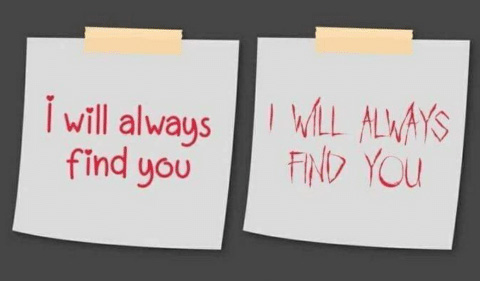
The letter, and particularly this week's exercise with font, reminded me of this meme, and how different font can drastically transform the tone of the message.

Part one focused mostly on experimentation with Hershey font.

In [6]:
import json

In [7]:
all_data = json.load(open("./hersheytext.json"))

In [8]:
all_data.keys()

dict_keys(['astrology', 'cursive', 'cyrillic', 'futural', 'futuram', 'gothiceng', 'gothicger', 'gothicita', 'greek', 'japanese', 'markers', 'mathlow', 'mathupp', 'meteorology', 'music', 'scriptc', 'scripts', 'symbolic', 'timesg', 'timesi', 'timesib', 'timesr', 'timesrb'])

The cell below grabs the sans-serif 1-stroke Hershey font:

In [9]:
futural = all_data['futural']['chars']

The resulting value is a list that has path data for each letter. To find the index for a letter, take its ASCII value and subtract 33:

In [10]:
def idx(ch):
    return ord(ch) - 33

In [11]:
futural[idx('g')]

{'d': 'M15,8 L15,24 14,27 13,28 11,29 8,29 6,28 M15,11 L13,9 11,8 8,8 6,9 4,11 3,14 3,16 4,19 6,21 8,22 11,22 13,21 15,19',
 'o': 10}

This returns *yet another dictionary*; the path data for the character is the value for key `d`. The function below combines all of this together, giving you the path data for the character in the font that you specify:

In [12]:
def dch(font, ch):
    if ch == ' ':
        return 'M8,0'
    else:
        return font[idx(ch)]['d']
print(dch(futural, 'a'))
print(dch(futural, ' '))

M15,8 L15,22 M15,11 L13,9 11,8 8,8 6,9 4,11 3,14 3,16 4,19 6,21 8,22 11,22 13,21 15,19
M8,0


In [13]:
from flat import command
from bezmerizing import Path

In [14]:
import numpy as np
def topath(font, ch):
    cmds = []
    mode = ''
    for t in dch(font, ch).split():
        if t[0] in ('M', 'L'):
            mode = t[0]
            t = t[1:]
        coords = [int(x) for x in t.split(',')]
        if mode == 'M':
            cmds.append(command.moveto(*coords))
        else:
            cmds.append(command.lineto(*coords))
    return Path(cmds)

Now the `topath()` function takes a Hershey font object (retrieved from the JSON) and the character you want to convert to a path:

In [15]:
topath(futural, "x")

Path([moveto(x=3.0000, y=8.0000), lineto(x=14.0000, y=22.0000), moveto(x=14.0000, y=8.0000), lineto(x=3.0000, y=22.0000)])

Let's draw this real quick with Flat. First, some Flat code that we need to draw and display:

In [16]:
from flat import document, shape, rgb
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

And now actually draw a character:

In [19]:
from itertools import chain
def strtopath(font, s, kern=1):
    current_x = 0
    all_paths = []
    for ch in s:
        path = topath(font, ch).translate(current_x, 0)
        all_paths.append(path)
        x_extent = max([c.x for c in path.commands])
        current_x = x_extent + kern
    return Path(list(chain(*all_paths)))

Here's what it looks like:

In [21]:
def strtopath_wrap(font, s, kern=1, lineheight=32, width=360, height=360):
    current = [0, 0]
    all_paths = []
    for word in s.split():
        wpath = strtopath(font, word, kern)
        wpath_width = max([c.x for c in wpath.commands])
        if current[0] + wpath_width > width:
            current[1] += lineheight
            current[0] = 0
        if current[1] > height - lineheight:
            break
        all_paths.append(wpath.translate(current[0], current[1]))
        current[0] += wpath_width + 8
    return Path(list(chain(*all_paths)))

In [61]:
src = '''\
P.S. 
Mother is in the hallway 
in the attic-3rd floor. 
She was too heavy to move.'''

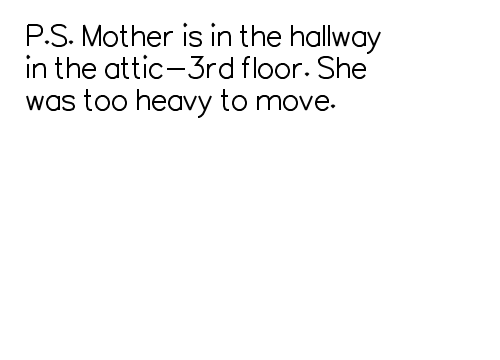

In [62]:
doc_height = 360 # points
doc_width = 500 # points
d = document(doc_width, doc_height, 'pt')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(2)
text_path = strtopath_wrap(futural, src).translate(24, 24)
page.place(line_fig.path(text_path))
show(page)

In [63]:
import sys
!{sys.executable} -m pip install opensimplex

In [64]:
import opensimplex

In [65]:
noisy = opensimplex.OpenSimplex()

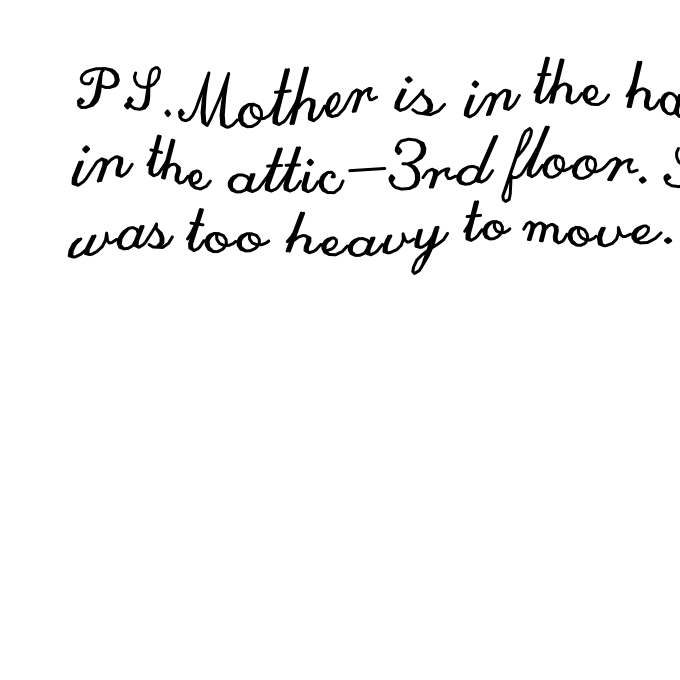

In [70]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=0)
doc_height = 240 # points
doc_width = 240 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(3).join('round').cap('round')
for i in range(1):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 100*i*0.02) * 8
        ny = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 100+(100*i*0.02)) * 8
        cmd.x += nx
        cmd.y += ny
    manip_tr = text_path.scale(0.75).translate(24, 24)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)

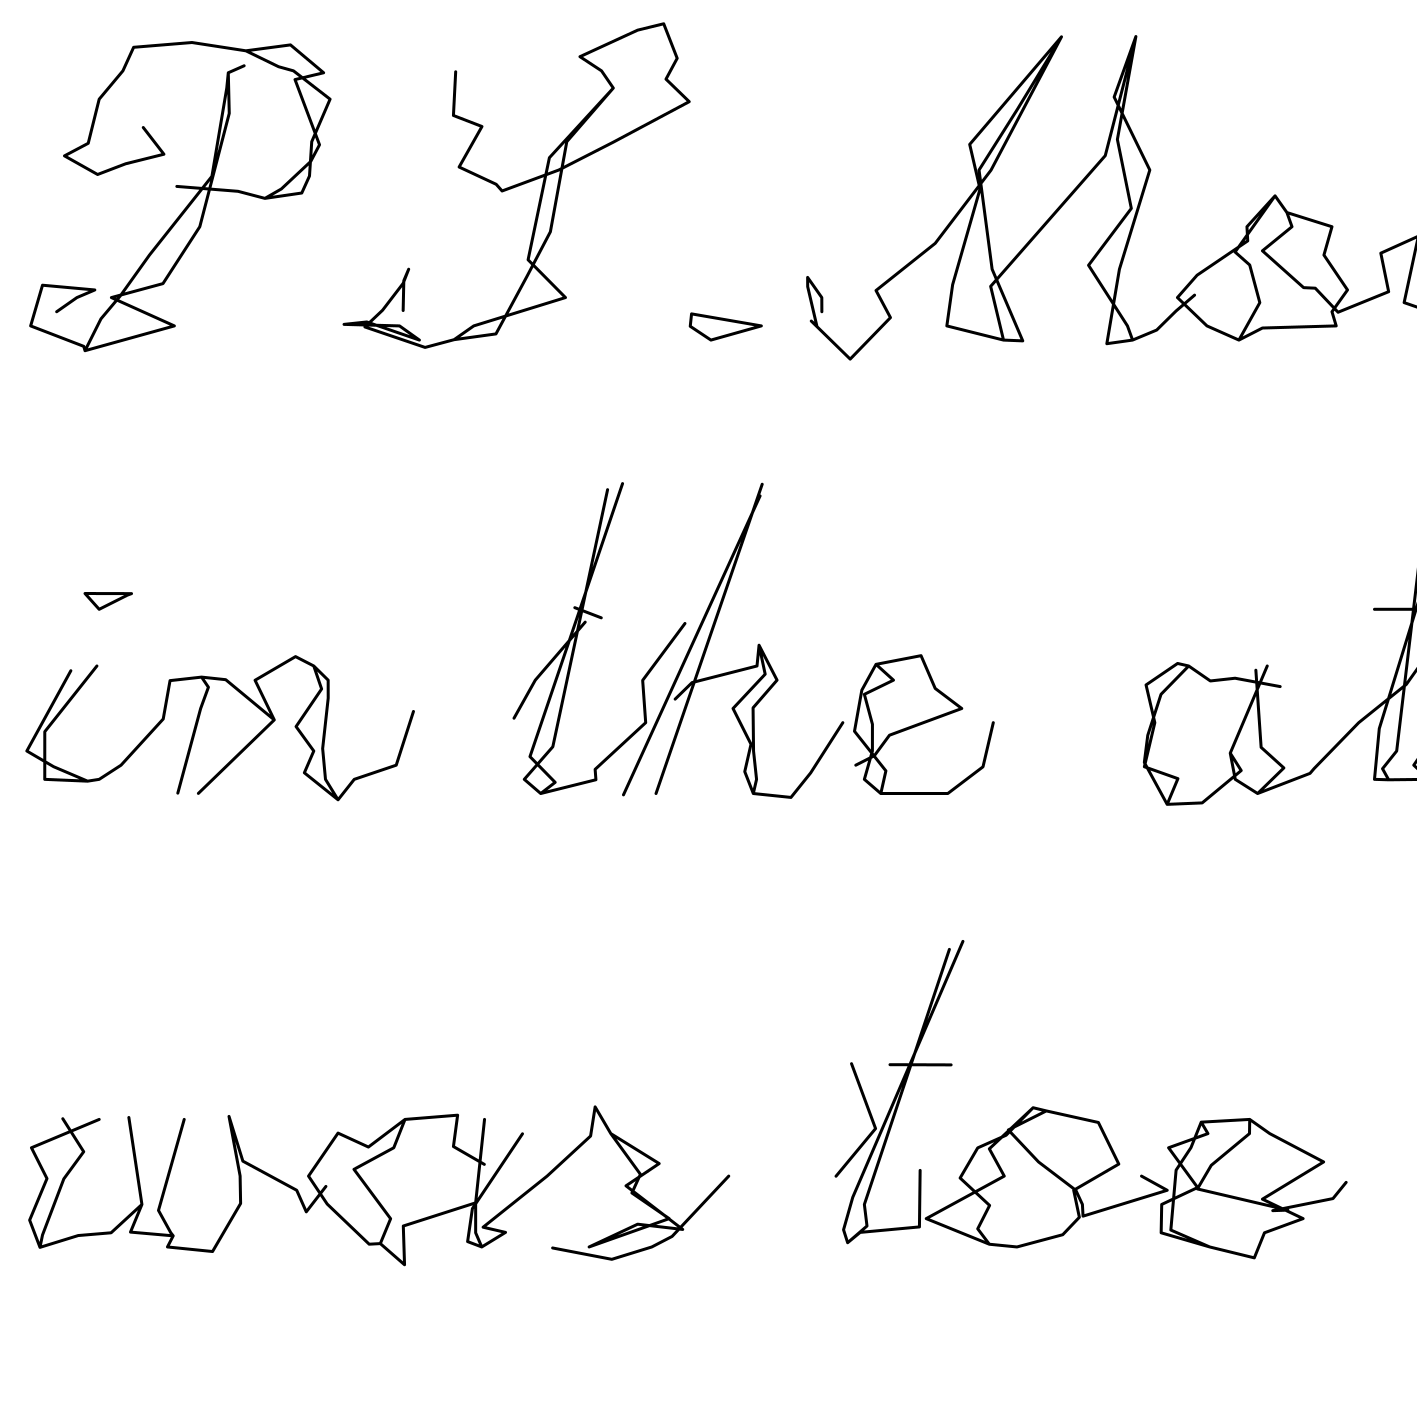

In [71]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=0)
doc_height = 500 # points
doc_width = 500 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(3).join('round').cap('round')
for i in range(1):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x*5, cmd.y*1, 5*i*1) * 5
        ny = noisy.noise3d(cmd.x*2, cmd.y*2, 100+(100*i*0.02)) * 2
        cmd.x += nx
        cmd.y += ny
    manip_tr = text_path.scale(5).translate(10, 10)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)

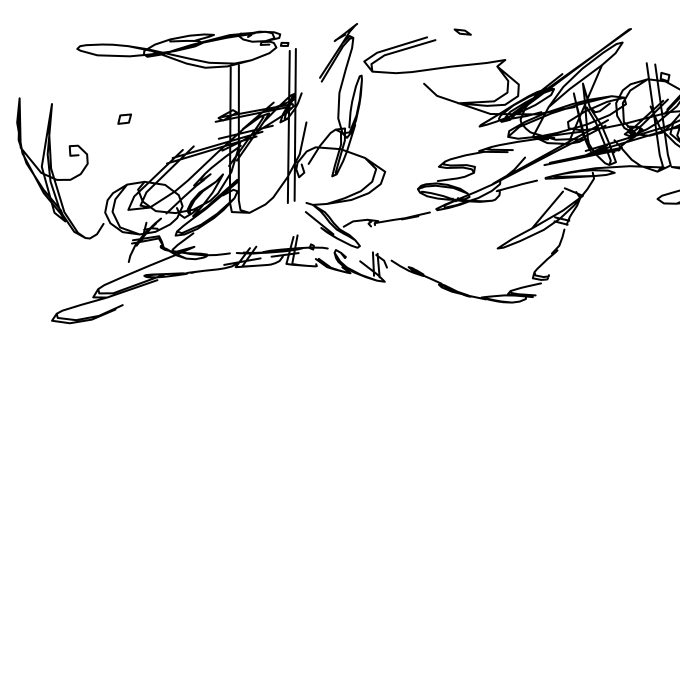

In [72]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=0)
doc_height = 240 # points
doc_width = 240 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(2).join('round').cap('round')
for i in range(1):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 10*i*0.02) * 8
        ny = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 100+(100*i*0.02)) * 8
        cmd.x += nx*20
        cmd.y += ny*10
    manip_tr = text_path.scale(0.75).translate(24, 24)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)

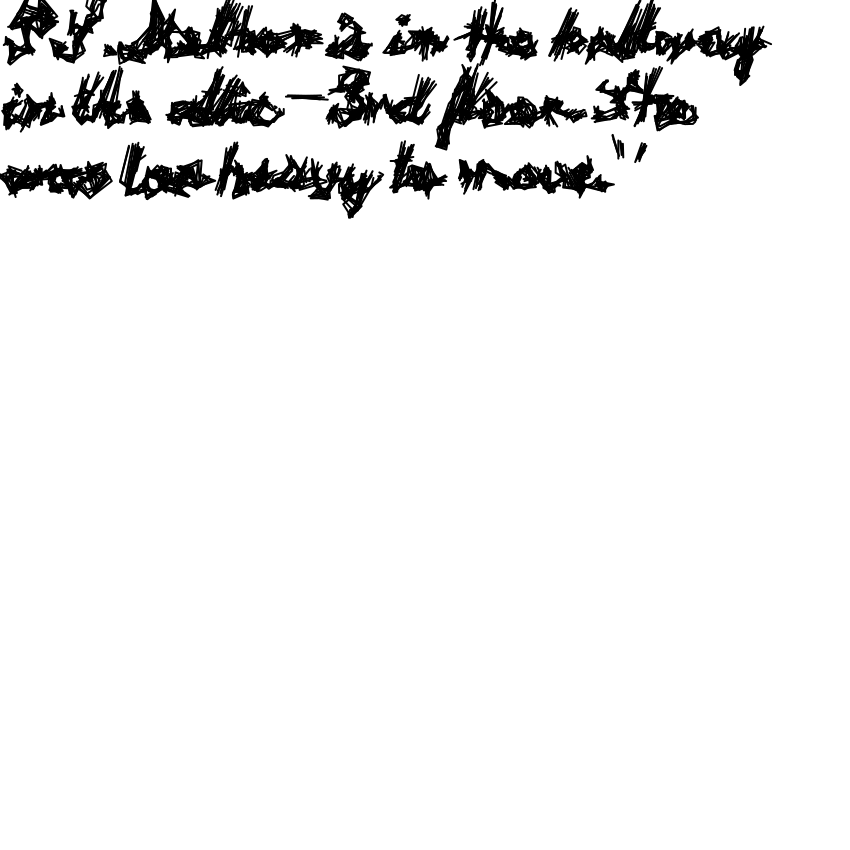

In [36]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=0)
doc_height = 300 # points
doc_width = 300 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(2).join('round').cap('round')
for i in range(5):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x, cmd.y*0.2, 20*i*0.02) * 2
        ny = noisy.noise3d(cmd.x*0.5, cmd.y*0.2, 100+(100*i*0.02)) * 2
        cmd.x += nx*2
        cmd.y += ny*2
    manip_tr = text_path.scale(0.75).translate(2, 2)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)

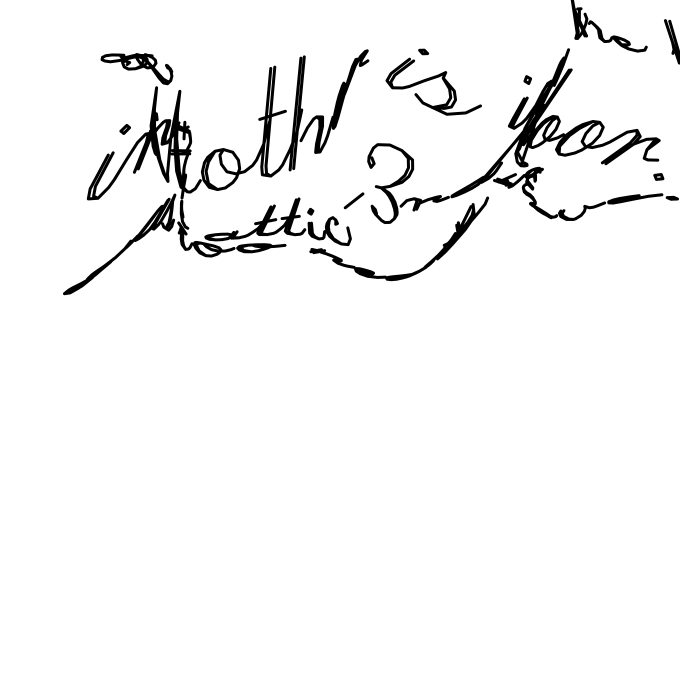

In [37]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=0)
doc_height = 240 # points
doc_width = 240 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(3).join('round').cap('round')
for i in range(1):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 100*i*0.02) * 50
        ny = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 100+(100*i*0.02)) * 50
        cmd.x += nx
        cmd.y += ny
    manip_tr = text_path.scale(0.75).translate(24, 24)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)

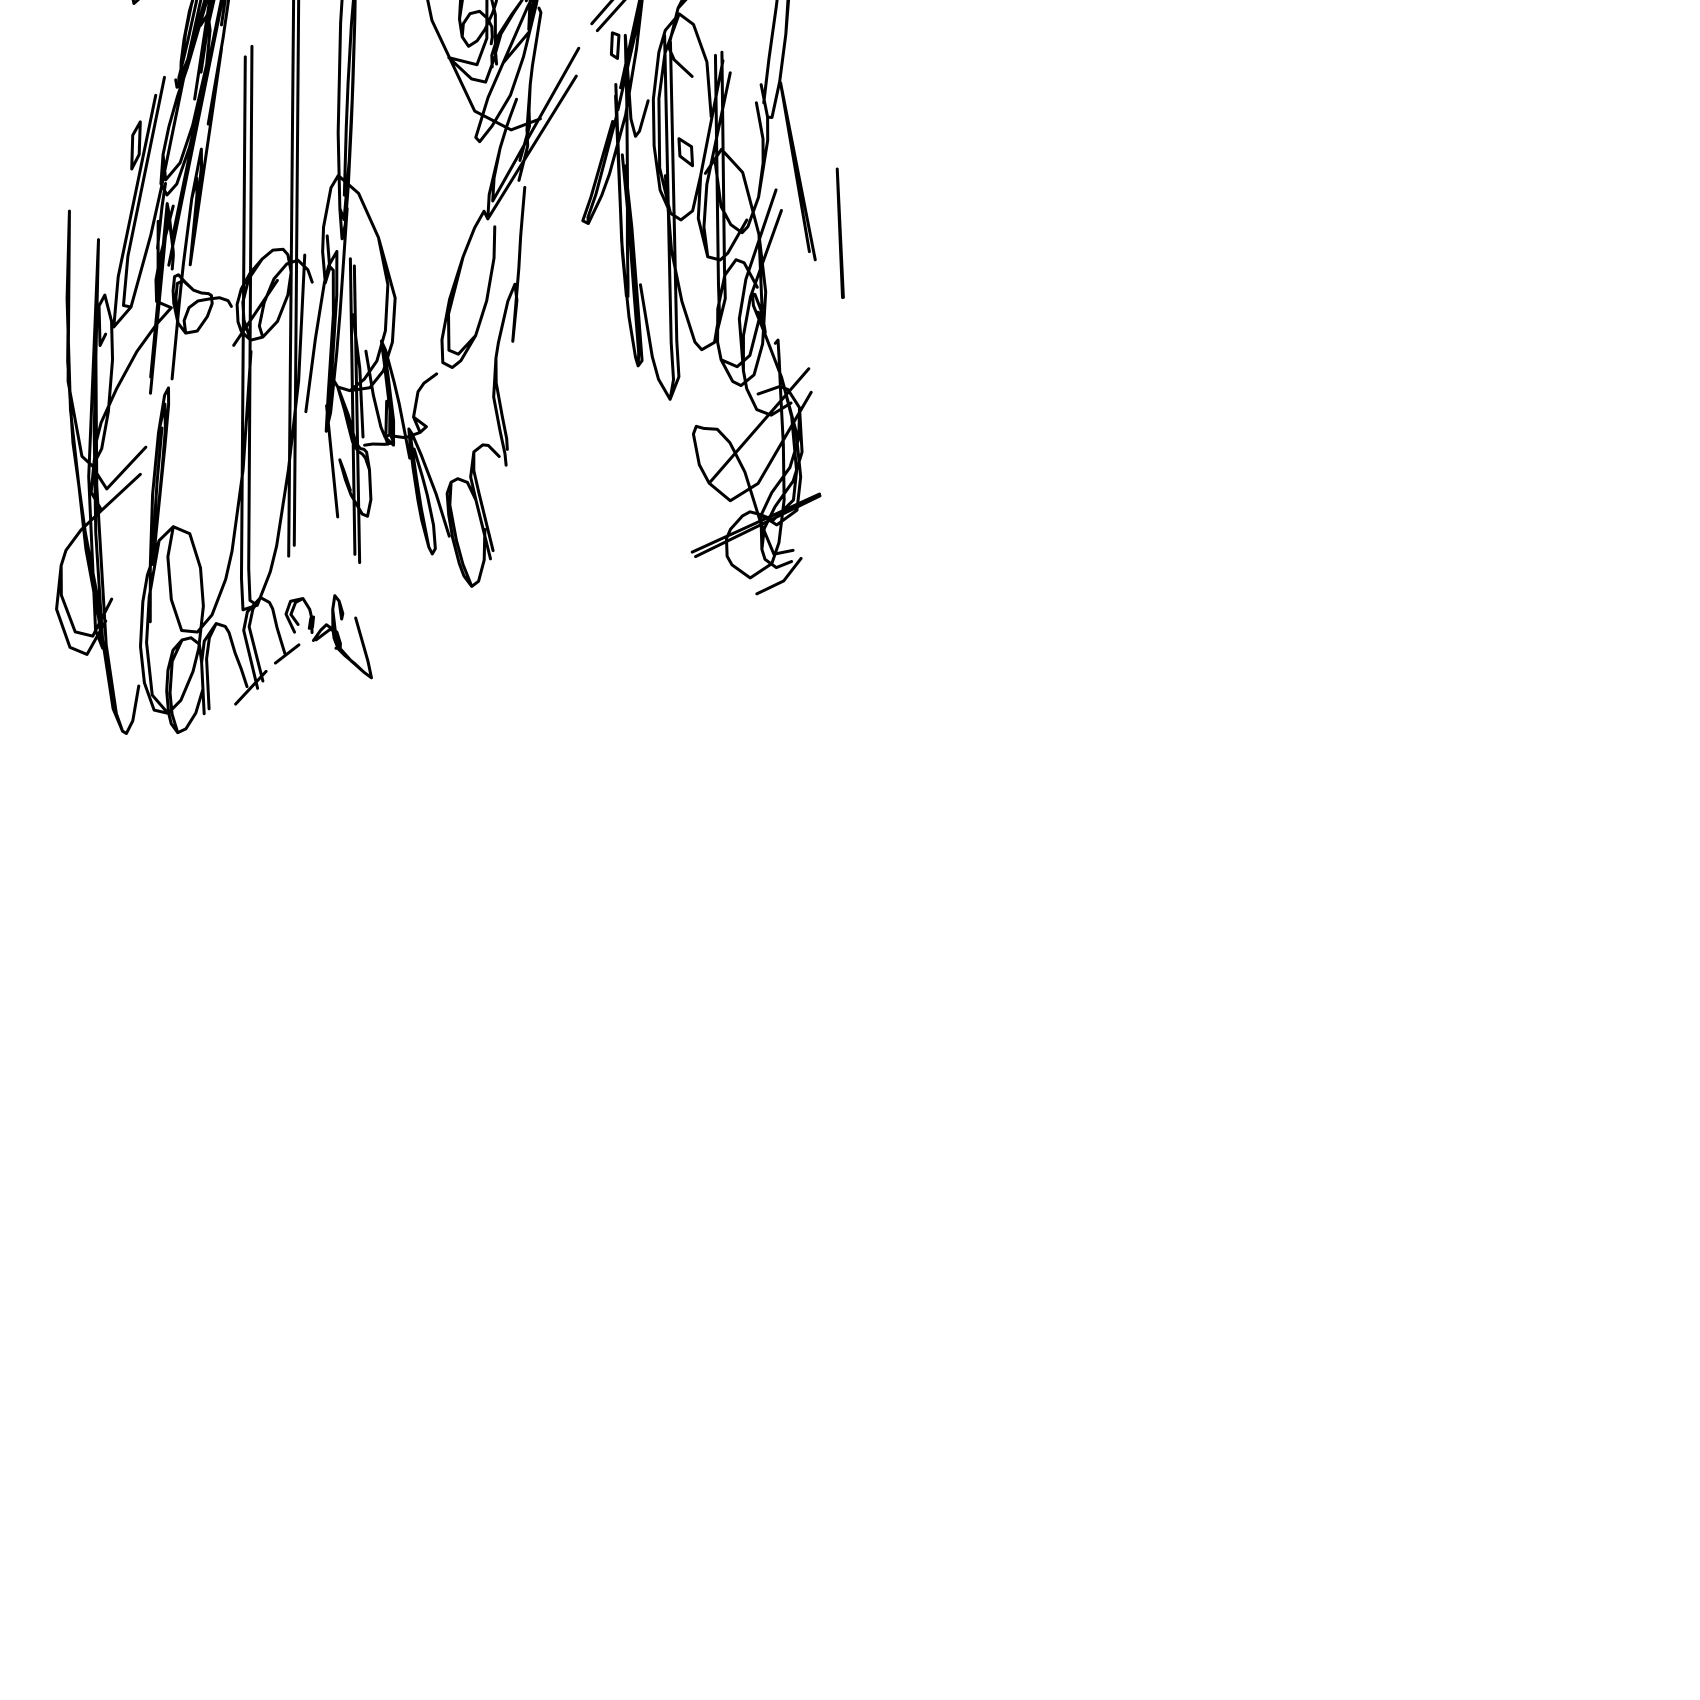

In [38]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=0)
doc_height = 600 # points
doc_width = 600 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(3).join('round').cap('round')
for i in range(1):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 100*i*0.02) * 120
        ny = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 100+(500*i*0.02)) * 400
        cmd.x += nx
        cmd.y += ny
    manip_tr = text_path.scale(0.75).translate(24, 24)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)

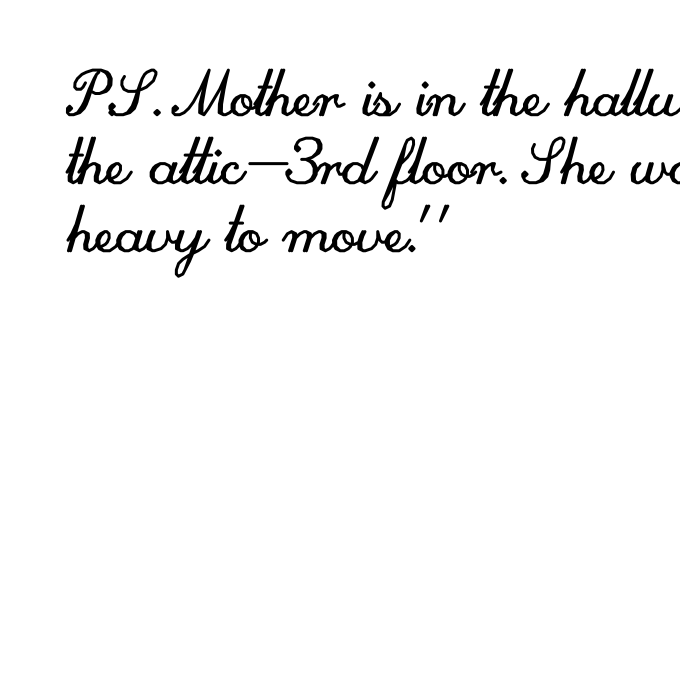

In [43]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=-2)
doc_height = 240 # points
doc_width = 240 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(3).join('round').cap('round')
for i in range(1):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 2*i*0.02) * -5
        ny = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 5+(100*i*0.02)) * -5
        cmd.x += nx/2
        cmd.y += ny/200
    manip_tr = text_path.scale(0.75).translate(24, 24)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)

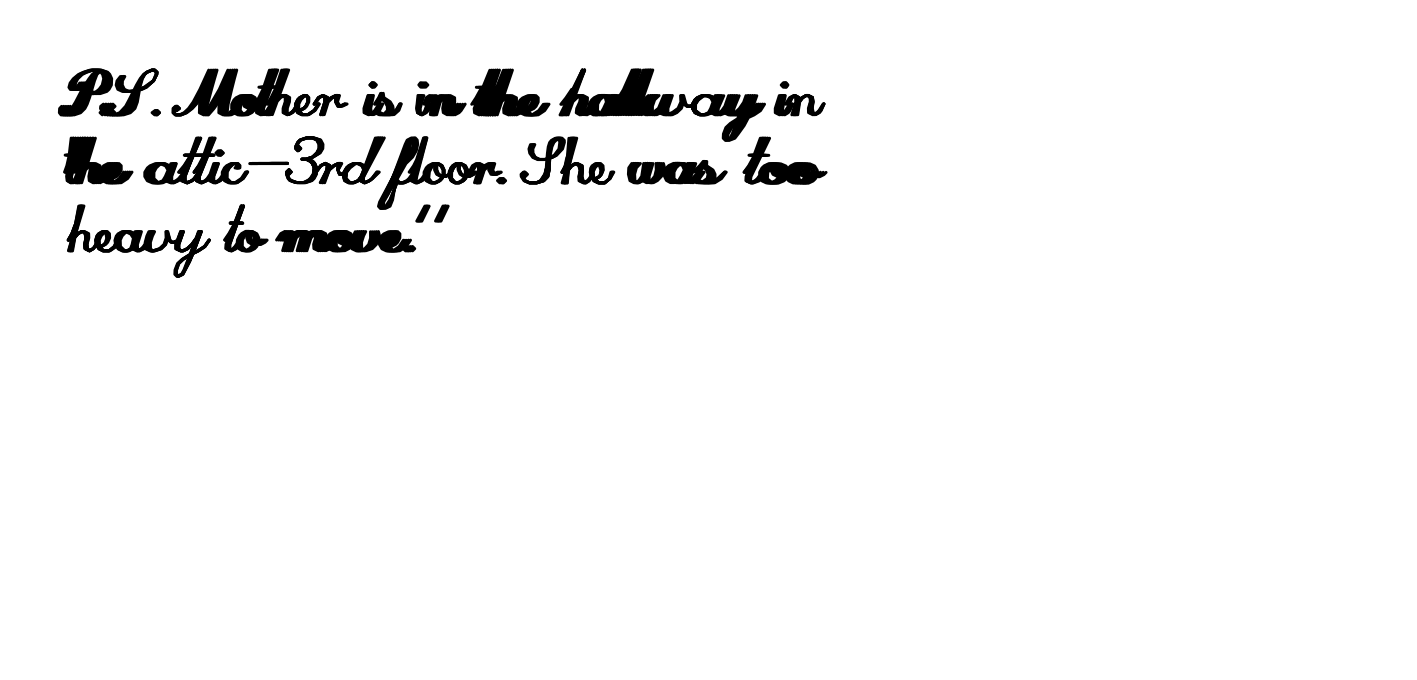

In [44]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=-2)
doc_height = 240 # points
doc_width = 500 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(3).join('round').cap('round')
for i in range(5):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 2*i*0.02) * 100
        ny = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 5+(100*i*5)) * 5
        cmd.x += nx/-50
        cmd.y += ny/50
    manip_tr = text_path.scale(0.75).translate(24, 24)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)

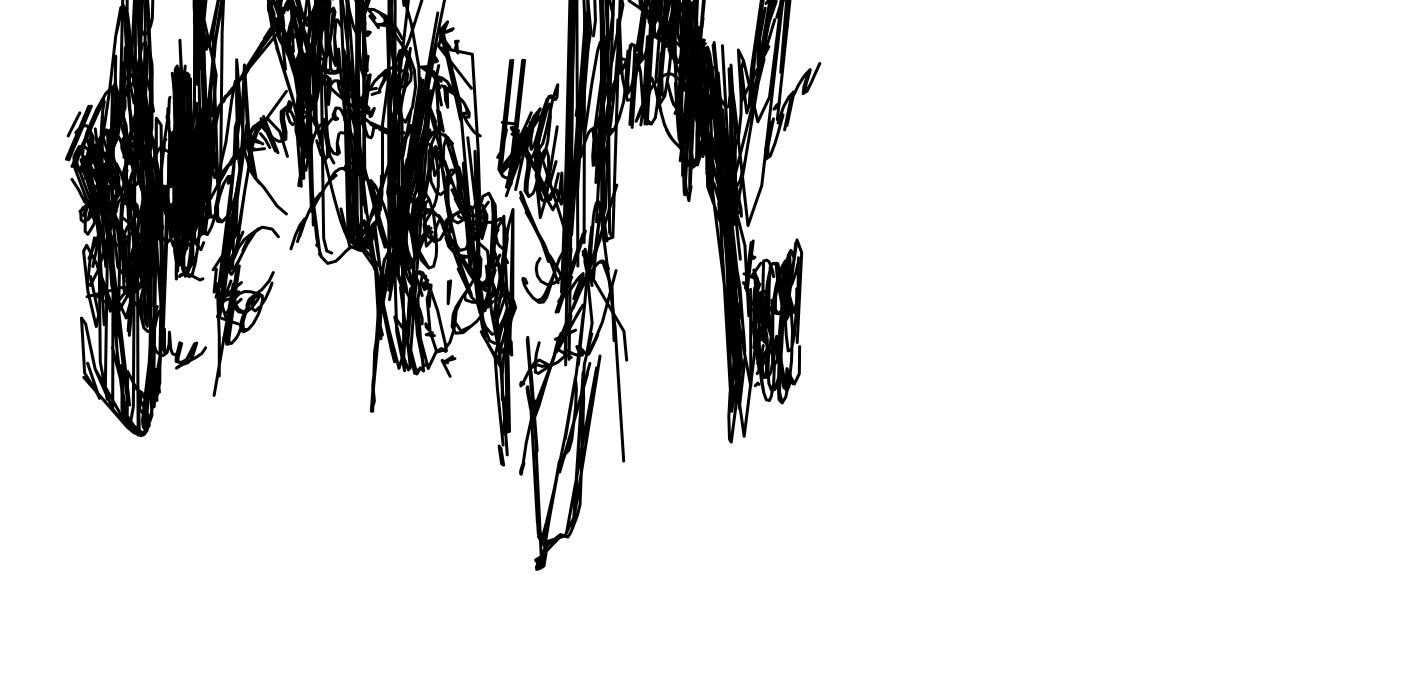

In [45]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=-2)
doc_height = 240 # points
doc_width = 500 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(3).join('round').cap('round')
for i in range(5):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 2*i*0.02) * 100
        ny = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 5+(100*i*5)) * 5
        cmd.x += nx/10
        cmd.y += ny*20
    manip_tr = text_path.scale(0.75).translate(24, 24)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)

In [49]:
from flat import document, shape, rgb
from IPython.display import SVG, display
def show(page):
    display(SVG(page.svg()))

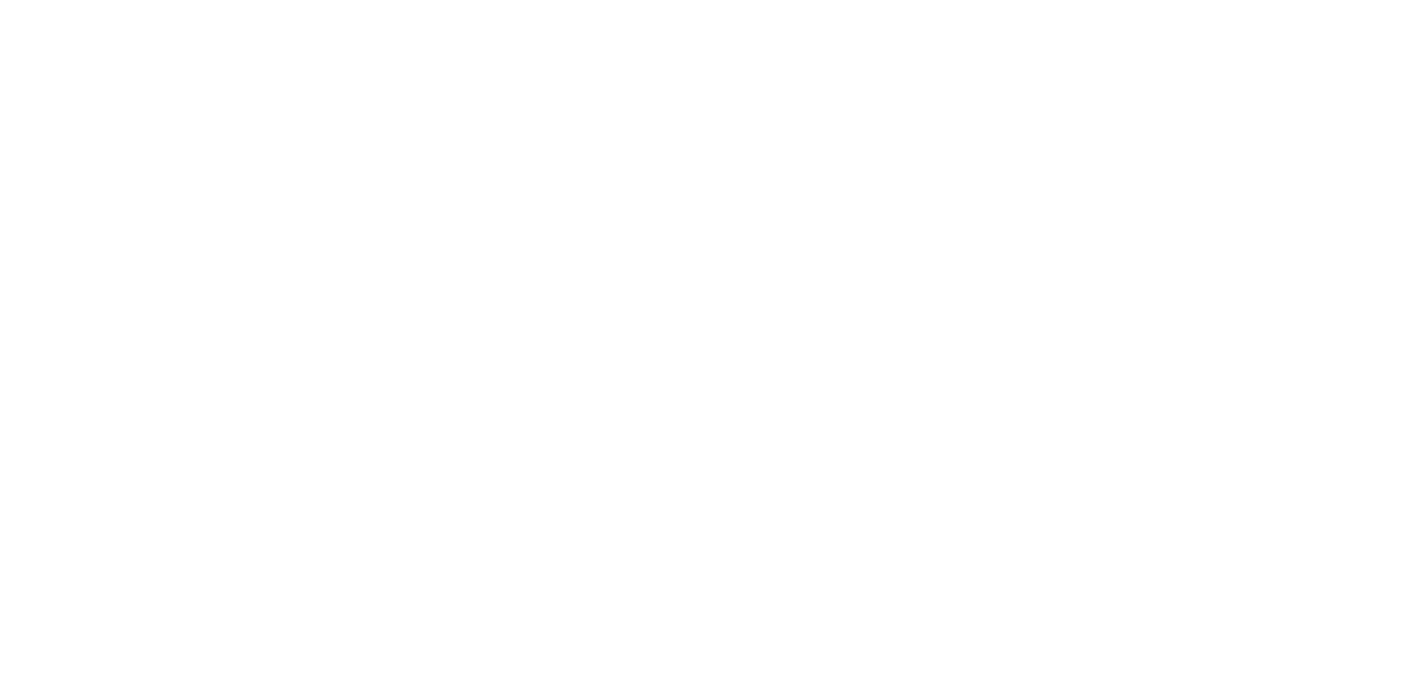

In [80]:
text_path = strtopath_wrap(all_data['scriptc']['chars'], src, kern=-2)
doc_height = 240 # points
doc_width = 500 # points
d = document(doc_width, doc_height, 'mm')
page = d.addpage()
line_fig = shape().stroke(rgb(0, 0, 0)).width(0.05).join('round').cap('round')
for i in range(5):
    manip = []
    for cmd in text_path:
        nx = noisy.noise3d(cmd.x*0.1, cmd.y*0.02, i*0.02) * 2
        ny = noisy.noise3d(cmd.x*0.02, cmd.y*0.02, 5+(100*i*5)) / 2
        cmd.x += nx/2
        cmd.y += ny/2
    manip_tr = text_path.scale(0.75).translate(24, 24)
    this_text = line_fig.path(manip_tr)
    page.place(this_text)
show(page)